# **1. Import Library**

Pada tahap ini, Kita perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Memuat Dataset dari Hasil Clustering**

Dataset hasil clustering dimuat dari file CSV ke dalam variabel DataFrame.

5 Baris Pertama Dataset:
   TransactionAmount TransactionType   Location Channel  CustomerAge  \
0              14.09           Debit  San Diego     ATM         70.0   
1             376.24           Debit    Houston     ATM         68.0   
2             126.29           Debit       Mesa  Online         19.0   
3             184.50           Debit    Raleigh  Online         26.0   
4              13.45          Credit    Atlanta  Online          NaN   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             Doctor                 81.0            1.0         5112.21   
1             Doctor                141.0            1.0        13758.91   
2            Student                 56.0            1.0         1122.35   
3            Student                 25.0            1.0         8569.06   
4            Student                198.0            1.0         7429.40   

   TransactionGapDate  ...  IPUsage  AmountRatio  TotalSaldo  \
0               572.0

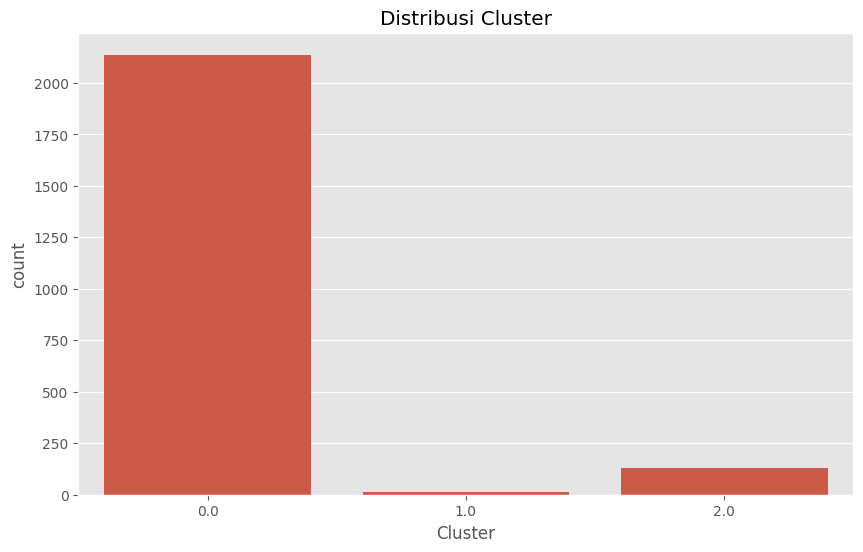

In [23]:
# Set style untuk visualisasi
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Membaca dataset hasil clustering dari file CSV
df = pd.read_csv('/content/drive/MyDrive/data_clustering.csv')

# Menampilkan 5 baris pertama dari dataset
print("5 Baris Pertama Dataset:")
print(df.head())

# Melihat distribusi cluster
print("\nDistribusi Cluster:")
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)

# Visualisasi distribusi cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df)
plt.title('Distribusi Cluster')
plt.show()

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [28]:
# Menentukan fitur dan target

# Print the column names to inspect them
print("Column names in the DataFrame:")
print(df.columns)

# Menentukan fitur dan target
X = df.drop(['Cluster', 'TransactionID', 'AccountID', 'TransactionDate', 'DeviceID',
            'IP Address', 'MerchantID', 'PreviousTransactionDate', 'Location'], axis=1, errors='ignore')
y = df['Cluster']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")

# Memisahkan fitur numerik dan kategorikal
numerical_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration',
                      'LoginAttempts', 'AccountBalance']
categorical_features = ['TransactionType', 'Channel', 'CustomerOccupation']

Column names in the DataFrame:
Index(['TransactionAmount', 'TransactionType', 'Location', 'Channel',
       'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'TransactionGapDate', 'DeviceUsage',
       'IPUsage', 'AmountRatio', 'TotalSaldo', 'MerchantPreference',
       'Binned_Amount', 'Cluster', 'DistanceToCentroid', 'NewCluster',
       'NewDistanceToCentroid', 'PotentialFraud'],
      dtype='object')
Jumlah data latih: 1775
Jumlah data uji: 762


# **4. Membangun Model Klasifikasi**

### **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.

  a. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
  b. Latih model menggunakan data latih.

In [31]:
# Preprocessor untuk standardisasi dan encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Model 1: Decision Tree
pipe_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Model 2: Random Forest
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Melatih model
# Melatih model Decision Tree

# Handle missing values in y_train before fitting
# Drop rows where y_train is NaN. We apply the same index drop to X_train
nan_mask_train = y_train.isna()
X_train_cleaned = X_train[~nan_mask_train]
y_train_cleaned = y_train[~nan_mask_train]

pipe_dt.fit(X_train_cleaned, y_train_cleaned)

# Handle missing values in y_test before predicting (optional, but good practice)
# Although the error was in fitting, predicting with NaNs in X_test might also cause issues later.
nan_mask_test = y_test.isna()
X_test_cleaned = X_test[~nan_mask_test]
y_test_cleaned = y_test[~nan_mask_test]


# Melatih model Random Forest
# Again, handle missing values if fitting RandomForest separately
# If you fit pipe_rf here, use the cleaned training data:
pipe_rf.fit(X_train_cleaned, y_train_cleaned)


# Prediksi dengan data uji
# Use the cleaned test data for prediction and evaluation
y_pred_dt = pipe_dt.predict(X_test_cleaned)
y_pred_rf = pipe_rf.predict(X_test_cleaned)

### **b. Kenapa menggunakan Decision Tree dan Random Forest?**

Keuntungan utama Decision Tree:
  - Mudah diinterpretasi dan divisualisasikan
  - Dapat menangani data numerik dan kategorikal
  - Mampu menangkap pola non-linear
  - Secara otomatis melakukan feature selection

Kelemahan:
  - Rentan terhadap overfitting, terutama jika pohon terlalu dalam
  - Dapat tidak stabil, perubahan kecil pada data dapat menghasilkan pohon yang sangat berbeda
  - Dapat bias terhadap fitur dengan banyak level berbeda


Keuntungan utama Random Forest:
  - Lebih akurat dan robust dibandingkan Decision Tree tunggal
  - Mengurangi overfitting dengan menggunakan banyak pohon
  - Dapat menangani data dengan dimensi tinggi tanpa feature selection
  - Memberikan perkiraan penting fitur (feature importance)

# **5. Evaluasi Model Klasifikasi**


Berikut adalah rekomendasi tahapannya.

  1. Lakukan prediksi menggunakan data uji.
  2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
  3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Evaluasi Model Decision Tree:
Accuracy: 0.9855

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       641
         1.0       0.83      0.71      0.77         7
         2.0       0.89      0.85      0.87        40

    accuracy                           0.99       688
   macro avg       0.91      0.85      0.88       688
weighted avg       0.98      0.99      0.99       688



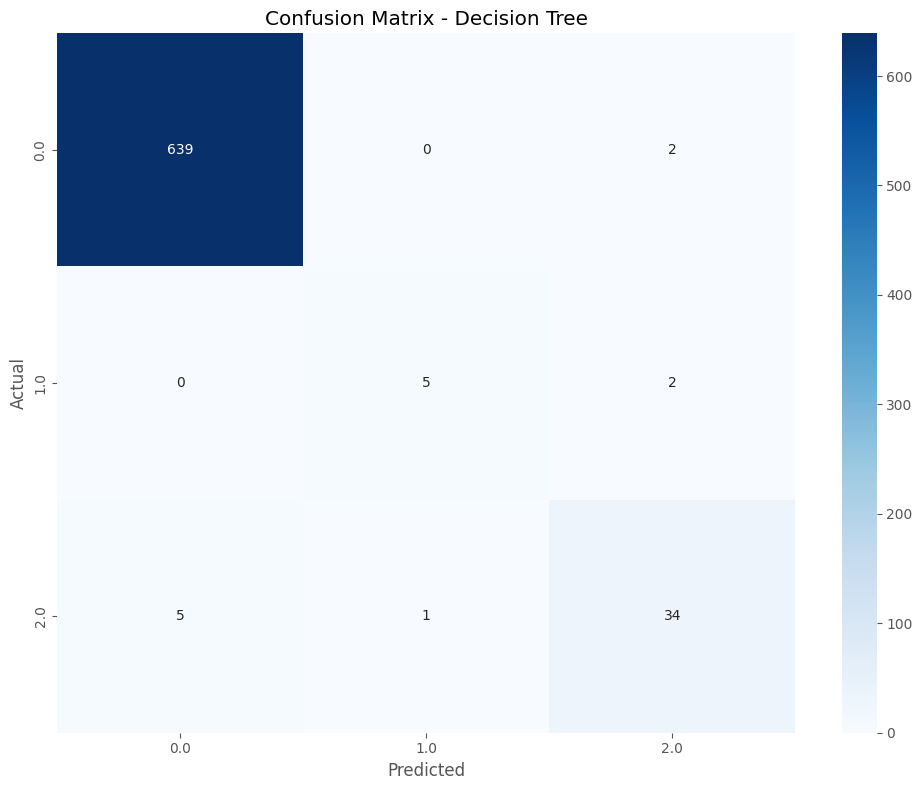


Evaluasi Model Random Forest:
Accuracy: 0.9666

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       641
         1.0       0.00      0.00      0.00         7
         2.0       0.76      0.62      0.68        40

    accuracy                           0.97       688
   macro avg       0.58      0.54      0.56       688
weighted avg       0.95      0.97      0.96       688



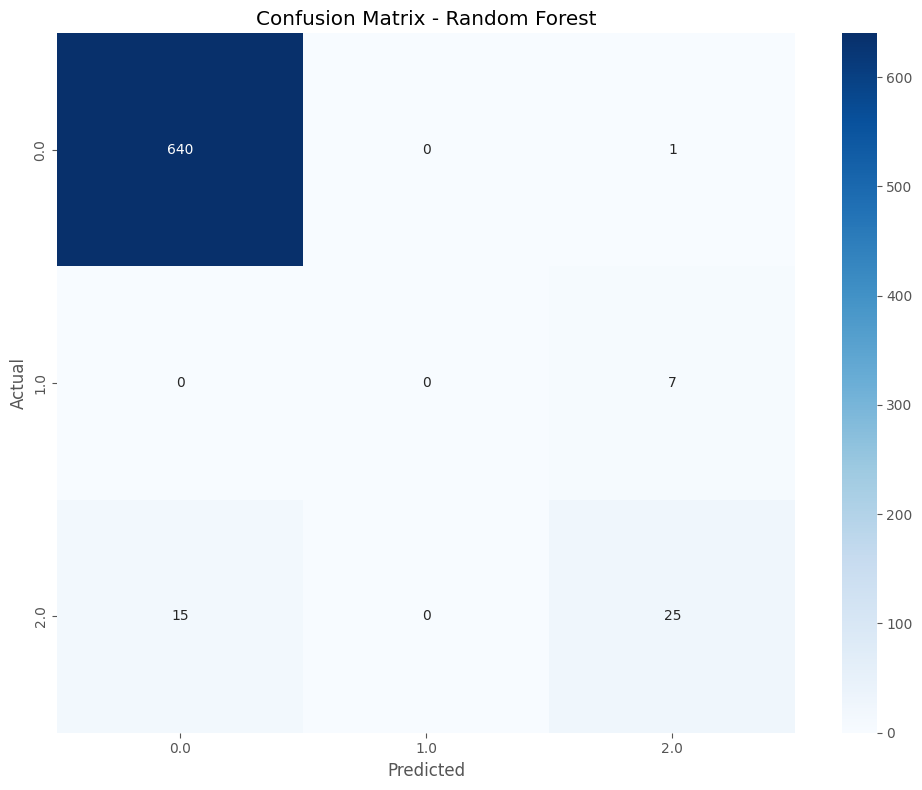

In [33]:
# Evaluasi model Decision Tree
print("\nEvaluasi Model Decision Tree:")
# Use y_test_cleaned for evaluation
accuracy_dt = accuracy_score(y_test_cleaned, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report:")
# Use y_test_cleaned for evaluation
print(classification_report(y_test_cleaned, y_pred_dt))

# Confusion Matrix untuk Decision Tree
plt.figure(figsize=(10, 8))
# Use y_test_cleaned for confusion matrix
conf_mat_dt = confusion_matrix(y_test_cleaned, y_pred_dt)
# Use unique values from the cleaned target variable for tick labels
sns.heatmap(conf_mat_dt, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_cleaned), yticklabels=np.unique(y_test_cleaned))
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Evaluasi model Random Forest
print("\nEvaluasi Model Random Forest:")
# Use y_test_cleaned for evaluation
accuracy_rf = accuracy_score(y_test_cleaned, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:")
# Use y_test_cleaned for evaluation
print(classification_report(y_test_cleaned, y_pred_rf))

# Confusion Matrix untuk Random Forest
plt.figure(figsize=(10, 8))
# Use y_test_cleaned for confusion matrix
conf_mat_rf = confusion_matrix(y_test_cleaned, y_pred_rf)
# Use unique values from the cleaned target variable for tick labels
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_cleaned), yticklabels=np.unique(y_test_cleaned))
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# **6. Penilaian (Opsional)**

### **Hasil evaluasi algoritma**

### **a. Decision Tree**

- Accuracy: 0.9855
- Kelebihan pada kasus ini:
  -Akurasi sangat tinggi dalam mengklasifikasikan mayoritas data (cluster 0).
  - Sangat baik dalam mengenali pola sederhana dalam data, terutama pada kelas mayoritas.
  - Proses pelatihan dan prediksi cepat.
  - Mudah diinterpretasikan dan divisualisasikan.
- Kekurangan pada kasus ini:
  - Rentan overfitting pada beberapa cluster minoritas.
  - Kinerja menurun saat harus mengklasifikasikan data pada kelas minoritas (misalnya, recall kelas 1 hanya 0.71).
  - Tidak cukup robust untuk data dengan variasi kompleks.

### **b. Random Forest**

- Accuracy sebelum tuning: 0.9666
- Kelebihan pada kasus ini:
  - Lebih robust terhadap outlier dan noise dalam data.
  - Menyediakan feature importance yang dapat membantu analisis lebih dalam terhadap data.
  - Dapat menangani pola yang lebih kompleks dibanding Decision Tree tunggal.
  - Memberikan performa keseluruhan cukup tinggi dengan weighted avg F1-score: 0.96.
- Kekurangan pada kasus ini:
  - Tidak mampu mengklasifikasikan kelas minoritas dengan baik (kelas 1 memiliki precision, recall, dan f1-score: 0.00).
  - Memiliki kompleksitas lebih tinggi, sehingga memerlukan lebih banyak sumber daya komputasi.
  - Kurang transparan dibandingkan Decision Tree, sehingga interpretasi lebih sulit.

### **Kesimpulan**

- Meskipun Decision Tree menunjukkan akurasi yang lebih tinggi secara keseluruhan, namun model ini cenderung overfit dan tidak cukup fleksibel dalam menangani data yang tidak seimbang (imbalance class).

- Random Forest lebih stabil dan cocok untuk data dengan noise, namun membutuhkan penyesuaian parameter lebih lanjut (hyperparameter tuning) agar dapat mengklasifikasikan kelas minoritas dengan baik.

### **Tuning Model Klasifikasi**

Menggunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [35]:
# Tuning hyperparameter untuk Random Forest (model dengan performa lebih baik)
print("\nMelakukan hyperparameter tuning untuk Random Forest...")

# Parameter grid untuk Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(pipe_rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_cleaned, y_train_cleaned)

# Menampilkan hasil hyperparameter terbaik
print("\nHyperparameter terbaik:")
print(grid_search.best_params_)


Melakukan hyperparameter tuning untuk Random Forest...

Hyperparameter terbaik:
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


### **Evaluasi Model Klasifikasi setelah Tuning**


Evaluasi Model Random Forest setelah Tuning:
Accuracy: 0.9651

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       641
         1.0       0.00      0.00      0.00         7
         2.0       0.77      0.57      0.66        40

    accuracy                           0.97       688
   macro avg       0.58      0.53      0.55       688
weighted avg       0.95      0.97      0.96       688



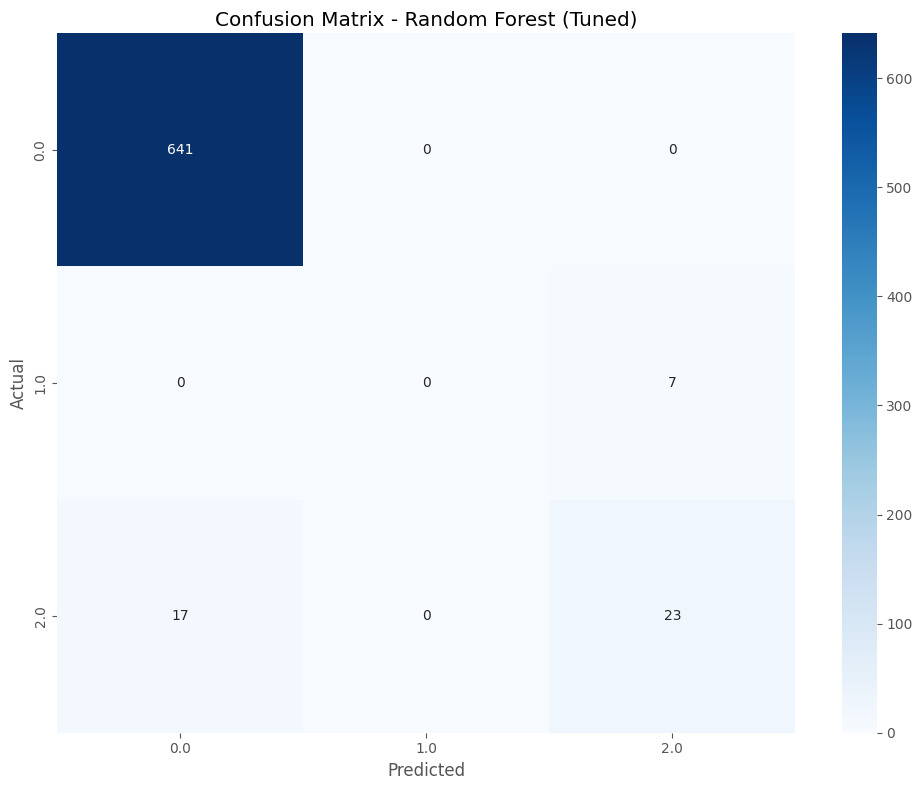

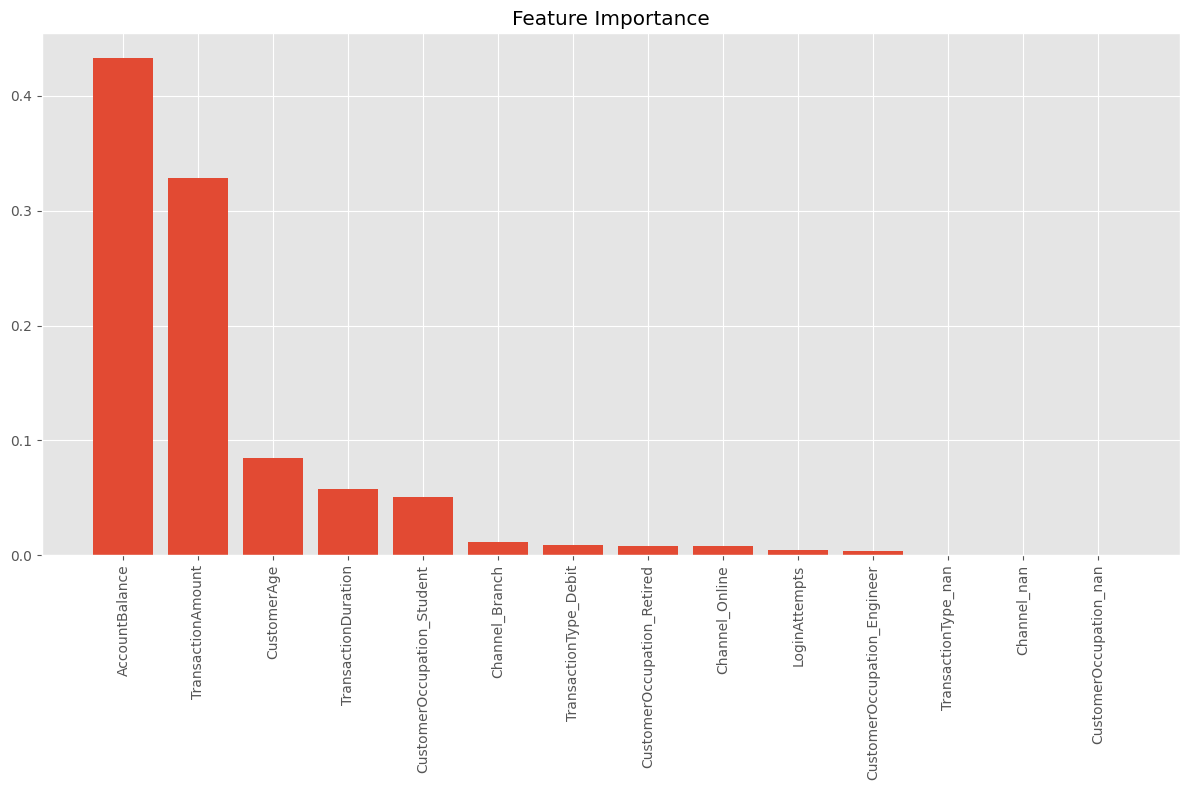

In [39]:
# Model dengan hyperparameter terbaik
best_rf = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred_best_rf = best_rf.predict(X_test_cleaned)

# Evaluasi model Random Forest setelah tuning
print("\nEvaluasi Model Random Forest setelah Tuning:")
# Use the cleaned test data for evaluation metrics
accuracy_best_rf = accuracy_score(y_test_cleaned, y_pred_best_rf)
print(f"Accuracy: {accuracy_best_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_cleaned, y_pred_best_rf))

# Confusion Matrix untuk Random Forest terbaik
plt.figure(figsize=(10, 8))
# Use the cleaned test data for confusion matrix
conf_mat_best_rf = confusion_matrix(y_test_cleaned, y_pred_best_rf)
# Use unique values from the cleaned target variable for tick labels
sns.heatmap(conf_mat_best_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_cleaned), yticklabels=np.unique(y_test_cleaned))
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


ohe_categories = best_rf.named_steps['preprocessor'].named_transformers_['cat'].categories_
encoded_categorical_feature_names = []
for i, feature in enumerate(categorical_features):
    # For drop='first', we skip the first category
    encoded_categorical_feature_names.extend([f"{feature}_{cat}" for cat in ohe_categories[i][1:]])

feature_names = numerical_features + encoded_categorical_feature_names

# Extrak feature importance dari model
importances = best_rf.named_steps['classifier'].feature_importances_

# Check if the number of importances matches the number of feature names
if len(importances) != len(feature_names):
    print(f"Warning: Number of feature importances ({len(importances)}) does not match the number of feature names ({len(feature_names)}).")
    print("This might indicate an issue with how feature names are generated.")

# Urutkan feature importance
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
# Ensure we only plot up to the number of available importances if there is a mismatch
num_features_to_plot = min(len(importances), len(feature_names))
plt.bar(range(num_features_to_plot), importances[indices[:num_features_to_plot]], align='center')
plt.xticks(range(num_features_to_plot), [feature_names[i] for i in indices[:num_features_to_plot]], rotation=90)
plt.tight_layout()
plt.show()

### **Kesimpulan**

- Meskipun akurasi terlihat tinggi, model memiliki kelemahan besar dalam mengenali kelas minoritas, terutama kelas 1.

- Tuning tidak membantu signifikan, bahkan kinerja pada kelas 2 justru menurun.

Hal ini menunjukkan bahwa model memerlukan:
  - Penyeimbangan data (oversampling kelas minoritas, SMOTE, dll)
  - Pemilihan metrik evaluasi yang lebih tepat, seperti macro F1-score atau recall untuk tiap kelas, bukan hanya akurasi.
  - Mungkin juga perlu meninjau ulang fitur yang digunakan atau mencoba model lain yang lebih sensitif terhadap data imbalance (misalnya, XGBoost atau class_weight adjustment di Random Forest).